In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']

In [2]:
df = pd.read_csv('mice_data.csv')

In [3]:
df.head()

,Diet,Bodyweight,Size
0,chow,21.51,16.599928
1,chow,28.14,22.194796
2,chow,24.04,17.505866
3,chow,23.45,17.360517
4,chow,23.68,17.142089


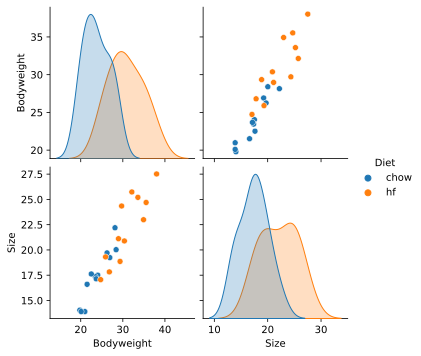

In [4]:
sns.pairplot(df, hue='Diet')

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df.Bodyweight.values.reshape(-1, 1), df.Size.values)

LinearRegression()

In [6]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('coefficient of determination:', model.score(df.Bodyweight.values.reshape(-1, 1), df.Size.values))


intercept: 0.30044601228598466
slope: [0.71300393]
coefficient of determination: 0.8784745185701885


<AxesSubplot:xlabel='Bodyweight', ylabel='Size'>

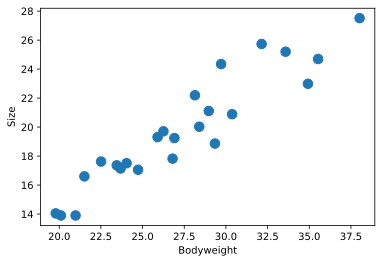

In [7]:
df.plot(kind='scatter', x='Bodyweight',y='Size', s=90)

<AxesSubplot:xlabel='Bodyweight', ylabel='Size'>

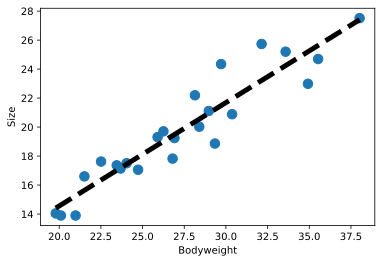

In [8]:
fig, ax = plt.subplots()

x = np.linspace(df.Bodyweight.min(), df.Bodyweight.max())
y = model.coef_*x + model.intercept_

ax.plot(x,y, 'k--', linewidth=5)
df.plot(kind='scatter', x='Bodyweight',y='Size', s=90,ax=ax)

<AxesSubplot:xlabel='Bodyweight', ylabel='Diet'>

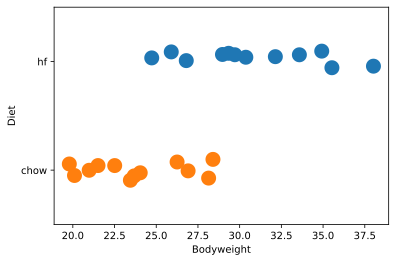

In [9]:
sns.stripplot(x='Bodyweight', y='Diet', data=df.sort_values(by='Diet', ascending=False), s=15)

<AxesSubplot:xlabel='Bodyweight', ylabel='Diet'>

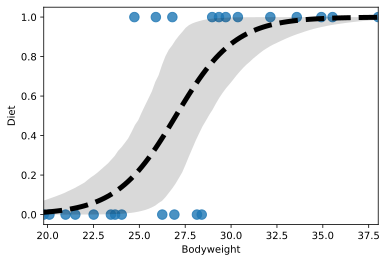

In [10]:
aux = df.copy()
aux.Diet = aux.Diet.map({'hf':1,'chow':0})

sns.regplot(x='Bodyweight', y='Diet', data=aux, logistic=True, 
            scatter_kws={"s": 90}, 
            line_kws={'color':'k','linewidth':5,'linestyle':'--'})

# sns.stripplot(x='Bodyweight', y='Diet', data=aux.sort_values(by='Diet', ascending=False), s=15)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(aux.Bodyweight.values.reshape(-1, 1), aux.Diet.values)

LogisticRegression()

In [12]:
model.coef_

array([[0.58116419]])

In [13]:
model.intercept_

array([-15.6886893])

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predict = model.predict(aux.Bodyweight.values.reshape(-1, 1))

print(classification_report(predict, aux.Diet.values))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.75      0.82      0.78        11

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.80      0.79      0.79        24



In [15]:
print(confusion_matrix(predict, aux.Diet.values))

[[10  3]
 [ 2  9]]


Text(0.5, 0, '')

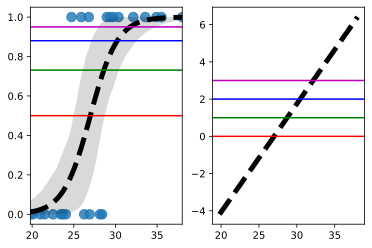

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2)

x = np.linspace(aux.Bodyweight.min(), aux.Bodyweight.max())
y = model.coef_[0]*x + model.intercept_

ax2.plot(x,y, 'k--', linewidth=5)

sns.regplot(x='Bodyweight', y='Diet', data=aux, logistic=True, 
            scatter_kws={"s": 90}, 
            line_kws={'color':'k','linewidth':5,'linestyle':'--'}, ax=ax1)

ax1.axhline(0.5, color='r')
ax2.axhline(0, color='r')

ax1.axhline(0.731, color='g')
ax2.axhline(1, color='g')

ax1.axhline(0.88, color='b')
ax2.axhline(2, color='b')


ax1.axhline(0.95, color='m')
ax2.axhline(3, color='m')

ax1.set_ylabel('')
ax1.set_xlabel('')

In [17]:
model.score(aux.Bodyweight.values.reshape(-1, 1), aux.Diet.values)

0.7916666666666666

## Dataset Covid

In [18]:
df = pd.read_csv('casos_obitos_doencas_preexistentes.csv',';')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648202 entries, 0 to 3648201
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   nome_munic               object 
 1   codigo_ibge              int64  
 2   idade                    float64
 3   cs_sexo                  object 
 4   diagnostico_covid19      object 
 5   data_inicio_sintomas     object 
 6   obito                    int64  
 7   asma                     object 
 8   cardiopatia              object 
 9   diabetes                 object 
 10  doenca_hematologica      object 
 11  doenca_hepatica          object 
 12  doenca_neurologica       object 
 13  doenca_renal             object 
 14  imunodepressao           object 
 15  obesidade                object 
 16  outros_fatores_de_risco  object 
 17  pneumopatia              object 
 18  puerpera                 object 
 19  sindrome_de_down         object 
dtypes: float64(1), int64(2), object(17)
memory usa

In [20]:
df.diagnostico_covid19.value_counts()

CONFIRMADO    3648202
Name: diagnostico_covid19, dtype: int64

In [21]:
df.drop('diagnostico_covid19', axis=1,inplace=True)

In [22]:
df.drop(['nome_munic','codigo_ibge'], axis=1,inplace=True)

In [23]:
df = df[df.cs_sexo.isin(['FEMININO', 'MASCULINO'])].copy()

In [24]:
df.shape

(3643305, 17)

In [25]:
df.drop('data_inicio_sintomas', axis=1,inplace=True)

In [26]:
df.asma.unique()

array(['IGNORADO', 'NÃO', 'SIM'], dtype=object)

In [27]:
df.columns

Index(['idade', 'cs_sexo', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down'],
      dtype='object')

In [29]:
auxcols = ['asma', 'cardiopatia', 'diabetes', 'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica', 'doenca_renal', 
 'imunodepressao', 'obesidade', 'outros_fatores_de_risco', 'pneumopatia', 'puerpera','sindrome_de_down']

In [30]:
df.cs_sexo = df.cs_sexo.map({'FEMININO':0,'MASCULINO':1})

In [31]:
for c in auxcols:
    df[c] = df[c].map({'IGNORADO':-1,'SIM':1, 'NÃO':0})

In [32]:
df['fica'] = df[auxcols].sum(axis=1)

In [33]:
len(auxcols)

13

In [34]:
# df.to_clipboard(index=False)

In [36]:
df[df['fica']>0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146659 entries, 140 to 3648158
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idade                    146659 non-null  float64
 1   cs_sexo                  146659 non-null  int64  
 2   obito                    146659 non-null  int64  
 3   asma                     146659 non-null  int64  
 4   cardiopatia              146659 non-null  int64  
 5   diabetes                 146659 non-null  int64  
 6   doenca_hematologica      146659 non-null  int64  
 7   doenca_hepatica          146659 non-null  int64  
 8   doenca_neurologica       146659 non-null  int64  
 9   doenca_renal             146659 non-null  int64  
 10  imunodepressao           146659 non-null  int64  
 11  obesidade                146659 non-null  int64  
 12  outros_fatores_de_risco  146659 non-null  int64  
 13  pneumopatia              146659 non-null  int64  
 14  p

In [37]:
df = df[df['fica']>0].copy()

In [38]:
df.sum()

idade                      9050857.0
cs_sexo                      77412.0
obito                        53823.0
asma                          6162.0
cardiopatia                  83574.0
diabetes                     59182.0
doenca_hematologica           1618.0
doenca_hepatica               1736.0
doenca_neurologica            8466.0
doenca_renal                  7708.0
imunodepressao                5083.0
obesidade                    20761.0
outros_fatores_de_risco      53606.0
pneumopatia                   7290.0
puerpera                      -692.0
sindrome_de_down               636.0
fica                        255130.0
dtype: float64

In [39]:
df.shape

(146659, 17)

In [40]:
df.obito.value_counts()

0    92836
1    53823
Name: obito, dtype: int64

In [41]:
53823/146659

0.36699418378687976

In [45]:
for c in auxcols:
    df[c] = df[c].map({-1:0,1:1, 0:0})

In [49]:
df.drop('fica', axis=1,inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146659 entries, 140 to 3648158
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idade                    146659 non-null  float64
 1   cs_sexo                  146659 non-null  int64  
 2   obito                    146659 non-null  int64  
 3   asma                     146659 non-null  int64  
 4   cardiopatia              146659 non-null  int64  
 5   diabetes                 146659 non-null  int64  
 6   doenca_hematologica      146659 non-null  int64  
 7   doenca_hepatica          146659 non-null  int64  
 8   doenca_neurologica       146659 non-null  int64  
 9   doenca_renal             146659 non-null  int64  
 10  imunodepressao           146659 non-null  int64  
 11  obesidade                146659 non-null  int64  
 12  outros_fatores_de_risco  146659 non-null  int64  
 13  pneumopatia              146659 non-null  int64  
 14  p

In [53]:
df.sum().sort_values()

puerpera                       741.0
sindrome_de_down               812.0
doenca_hematologica           1838.0
doenca_hepatica               2066.0
imunodepressao                5478.0
asma                          6661.0
pneumopatia                   7477.0
doenca_renal                  8172.0
doenca_neurologica            8769.0
obesidade                    22280.0
obito                        53823.0
outros_fatores_de_risco      58002.0
diabetes                     59298.0
cs_sexo                      77412.0
cardiopatia                  83655.0
idade                      9050857.0
dtype: float64

In [55]:
df.groupby('obito').sum()

,idade,cs_sexo,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
obito,,,,,,,,,,,,,,,
0,5432569.0,47965,4798,50896,35450,1060,1053,4091,3856,2981,14094,35892,3763,572,519
1,3618288.0,29447,1863,32759,23848,778,1013,4678,4316,2497,8186,22110,3714,169,293


In [56]:
df.outros_fatores_de_risco = df[['puerpera','sindrome_de_down']].sum(axis=1)

In [57]:
df.drop(['puerpera','sindrome_de_down'], axis=1,inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146659 entries, 140 to 3648158
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idade                    146659 non-null  float64
 1   cs_sexo                  146659 non-null  int64  
 2   obito                    146659 non-null  int64  
 3   asma                     146659 non-null  int64  
 4   cardiopatia              146659 non-null  int64  
 5   diabetes                 146659 non-null  int64  
 6   doenca_hematologica      146659 non-null  int64  
 7   doenca_hepatica          146659 non-null  int64  
 8   doenca_neurologica       146659 non-null  int64  
 9   doenca_renal             146659 non-null  int64  
 10  imunodepressao           146659 non-null  int64  
 11  obesidade                146659 non-null  int64  
 12  outros_fatores_de_risco  146659 non-null  int64  
 13  pneumopatia              146659 non-null  int64  
dtypes

In [61]:
df[['obito','idade', 'cs_sexo', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia']].to_csv('obitos_comorbs.csv',index=False)

In [62]:
df = pd.read_csv('obitos_comorbs.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146659 entries, 0 to 146658
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   obito                    146659 non-null  int64  
 1   idade                    146659 non-null  float64
 2   cs_sexo                  146659 non-null  int64  
 3   asma                     146659 non-null  int64  
 4   cardiopatia              146659 non-null  int64  
 5   diabetes                 146659 non-null  int64  
 6   doenca_hematologica      146659 non-null  int64  
 7   doenca_hepatica          146659 non-null  int64  
 8   doenca_neurologica       146659 non-null  int64  
 9   doenca_renal             146659 non-null  int64  
 10  imunodepressao           146659 non-null  int64  
 11  obesidade                146659 non-null  int64  
 12  outros_fatores_de_risco  146659 non-null  int64  
 13  pneumopatia              146659 non-null  int64  
dtypes: f

In [67]:
df.obito.sum()/df.obito.shape[0]

0.36699418378687976

In [68]:
from sklearn.model_selection import train_test_split

In [88]:
x = df.drop('obito', axis=1)
y = df.obito

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)


y_pred = model.predict(x_test)


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.68      0.77     35735
           1       0.30      0.58      0.39      8263

    accuracy                           0.66     43998
   macro avg       0.59      0.63      0.58     43998
weighted avg       0.77      0.66      0.70     43998



In [89]:
x = df.drop('obito', axis=1)
y = df.obito

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)


y_pred = model.predict(x_test)


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77     35866
           1       0.30      0.58      0.39      8132

    accuracy                           0.67     43998
   macro avg       0.59      0.63      0.58     43998
weighted avg       0.77      0.67      0.70     43998



In [102]:
print(confusion_matrix(y_pred, y_test))

[[24528 11338]
 [ 3378  4754]]


In [101]:
list(zip(x_train.columns,model.coef_[0]))

[('idade', 0.03920790098486575),
 ('cs_sexo', 0.19945042111498582),
 ('asma', -0.17309618959222456),
 ('cardiopatia', 0.01160089748690775),
 ('diabetes', 0.1548407464922252),
 ('doenca_hematologica', 0.08687304977481425),
 ('doenca_hepatica', 0.42383874109351793),
 ('doenca_neurologica', 0.4205181380478184),
 ('doenca_renal', 0.5508070870047878),
 ('imunodepressao', 0.42827042533892534),
 ('obesidade', 0.4483386460807622),
 ('outros_fatores_de_risco', -0.049366740597730996),
 ('pneumopatia', 0.3307690106049866)]

In [ ]:
model.